# Random Signals and LTI-Systems

*This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Linear Mean

In the following we aim at finding a relation between the linear mean $\mu_x[k]$ of the input signal $x[k]$ and the linear mean $\mu_y[k]$ of the output signal $y[k] = \mathcal{H} \{ x[k] \}$ of a linear time-invariant (LTI) system.

### Non-Stationary Input Signal

Let's first impose no restrictions in terms of stationarity to the input signal. The [linear mean](../random_signals/ensemble_averages.ipynb#Linear-mean) of the output signal is then given as

\begin{equation}
\mu_y[k] = E\{ y[k] \} = E\{ x[k] * h[k] \}
\end{equation}

where $h[k]$ denotes the impulse response of the system. Since the convolution and the ensemble average are linear operations, and $h[k]$ is a deterministic signal, this can be rewritten as

\begin{equation}
\mu_y[k] = \mu_x[k] * h[k]
\end{equation}

The linear mean of the output signal $\mu_y[k]$ is given as the convolution of the linear mean of the input signal $\mu_x[k]$ with the impulse response $h[k]$ of the system.

#### Example

The linear mean $\mu_y[k]$ of the output of an LTI system with given impulse response $h[k]$ and non-stationary random input signal $x[k]$ is computed. The estimated linear means $\hat{\mu}_x[k]$ and $\hat{\mu}_y[k]$ of the input and output signals are plotted.

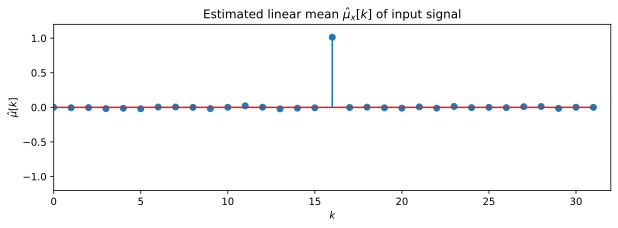

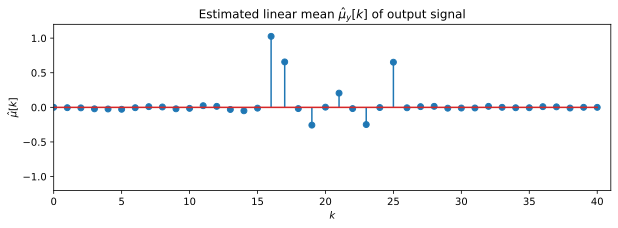

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

L = 32  # number of random samples
N = 10000  # number of sample functions

# generate input signal (white Gaussian noise)
np.random.seed(2)
x = np.random.normal(size=(N, L))
x[:, L//2] += 1
# generate output signal
h = 2*np.fft.irfft([1, 1, 1, 0, 0, 0])
y = np.asarray([np.convolve(x[n, :], h, mode='full') for n in range(N)])


def estimate_plot_linear_mean(x):
    # estimate and plot linear mean
    # estimate linear mean by ensemble average
    mu = 1/N * np.sum(x, 0)
    # plot linear mean
    plt.stem(mu, use_line_collection=True)
    plt.xlabel(r'$k$')
    plt.ylabel(r'$\hat{\mu}[k]$')
    plt.axis([0, x.shape[1], -1.2, 1.2])


plt.figure(figsize=(10, 3))
plt.title(r'Estimated linear mean $\hat{\mu}_x[k]$ of input signal')
estimate_plot_linear_mean(x)

plt.figure(figsize=(10, 3))
plt.title(r'Estimated linear mean $\hat{\mu}_y[k]$ of output signal')
estimate_plot_linear_mean(y)

**Exercise**

* Can you estimate the impulse response $h[k]$ of the system from above plots of $\hat{\mu}_x[k]$ and $\hat{\mu}_y[k]$?
* You can check your results by plotting the impulse response $h[k]$, for instance with the command `plt.stem(h)`.

Solution: Inspecting above plot, the linear mean of the input signal can be approximated as $\mu_x[k] = \delta[k]$. The linear mean of the output is then given as $\mu_y[k] = \delta[k] * h[k] = h[k]$. It follows that the impulse response of the LTI system can be estimated from the linear mean $\mu_y[k]$.

### Stationary Input Signal

For a (wide-sense) stationary process, the linear mean of the input signal $\mu_x[k] = \mu_x$ does not depend on the time index $k$. For a (wide-sense) stationary input signal, also the output signal of the system is (wide-sense) stationary. Using the result for the non-stationary case above yields

\begin{equation}
\begin{split}
\mu_y &= \mu_x * h[k] \\
&= \sum_{\kappa = -\infty}^{\infty}\mu_x[k-\kappa]h[\kappa] \\
&= \mu_x \cdot \sum_{\kappa = -\infty}^{\infty}h[\kappa] \\
&= \mu_x \cdot \sum_{\kappa = -\infty}^{\infty}h[\kappa]\cdot\mathrm{e}^{-\mathrm{j}\Omega\kappa} \hspace{5mm} \text{for}\,\,\Omega=0 \\
&= \mu_x \cdot H(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \big\vert_{\Omega = 0}
\end{split}
\end{equation}

where $H(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \mathcal{F}_* \{ h[k] \}$ denotes the discrete time Fourier transformation (DTFT) of the impulse response. The linear mean of a (wide-sense) stationary input signal is weighted by the transmission characteristics for the constant (i.e. DC, $\Omega = 0$) component of the LTI system. This implies that for a system which just attenuates the input signal $y[k] = A \cdot x[k]$, e.g. an ideal amplifier, the linear mean at the output is given as $\mu_y = A \cdot \mu_x$. Furthermore, if the input signal is zero-mean $\mu_x = 0$, the output signal is also zero-mean $\mu_y = 0$.

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Digital Signal Processing - Lecture notes featuring computational examples.